# Problem Statement

## Part 1.1 : 
#### AIML module project part I consists of task to train and compare image classifier models using supervised learning classifier, neural network classifier and a CNN classifier. 

**DOMAIN:** Botanical research

**CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of
plant and plant seedlings at various stages of growth. They already have invested on curating sample images.
They require an automation which can create a classifier capable of determining a plant's species from a photo.

**DATA DESCRIPTION:** The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/plant-seedlings-classification/data

**PROJECT OBJECTIVE:** University’s management require an automation which can create a classifier capable of
determining a plant's species from a photo

### Steps and tasks: [ Total Score: 20 points]
1. Import the data. Analyse the dimensions of the data. Visualise the data.
2. Train tune and test AIML image classifier model using:
• Use supervised learning algorithms for training
• Use neural networks for training
• Use CNN for training
3. Compare the results from the above step along with your detailed observations.
4. Pickle the best performing model.
5. Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image
classifier model to predict the class.

# Data Importing and Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
!pip install python-resize-image

In [2]:
# !pip install catboost

In [3]:
# !pip install tensorflow

In [9]:
from pathlib import Path
import glob
import pandas as pd
import numpy as np
from PIL import Image
from resizeimage import resizeimage
import matplotlib as mp
import matplotlib.pyplot as plt
import cv2
import os

import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.initializers import he_uniform
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
# from catboost import CatBoostClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import pydot
import pydotplus
from pydotplus import graphviz
from IPython.display import Image 
import os
import math
import h5py
import tkinter as tk
from tkinter import ttk
import re
import pathlib



In [10]:

print("Done")
import tensorflow

Done


In [11]:
python --version

NameError: name 'python' is not defined

In [12]:
import warnings

warnings.filterwarnings('ignore')


In [13]:
# REmove 

# # used to supress display of warnings

# # os is used to provide a way of using operating system dependent functionality
# # We use it for setting working folder
# import os

# # Pandas is used for data manipulation and analysis
# import pandas as pd 

# import numpy as np

# import matplotlib.pyplot as plt
# %matplotlib inline
# # from matplotlib import pyplot

# import seaborn as sns
# import tensorflow 


# # from PIL import Image
# # from PIL import ImageMath

# from keras.preprocessing import image
# import random
# import pickle
# from keras import models, layers, callbacks
# import shutil
# # import cv2
# from math import sqrt, floor
# # from prettytable import PrettyTable

In [14]:
#remove 

# os.chdir("/content/drive/MyDrive/Colab Notebooks/CV with CNN Project 1 -Dataset/")


In [15]:
# excute only once

# import zipfile
# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/CV with CNN Project 1 -Dataset/Dataset - Plant-seedlings-classification.zip", 'r')
# zip_ref.extractall("/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Plant-seedlings-classification")
# zip_ref.close()

# Exploratory data analysis (EDA)

In [17]:
train_path = 'D:/Dataset - Plant-seedlings-classification/train'
test_path = 'D:/Dataset - Plant-seedlings-classification/test'



# data_dir_train_path = '/kaggle/input/plant-seedlings-classification/train'
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

folder_train = list(data_dir_train.glob('*'))
images_train = list(data_dir_train.glob('*/*.png')) #list of all images (full path)
images_test = list(data_dir_test.glob('*.png'))
print('Folder Structure:')
for f in folder_train:
    print(f)
print('\nTotal Number of training images: ', len(images_train))
print('\nTotal Number of testing images: ', len(images_test))


# train_data = os.listdir(train_path)
# test_path = os.listdir(test_path)
# len(train_path), len(test_path)

Folder Structure:
D:\Dataset - Plant-seedlings-classification\train\Black-grass
D:\Dataset - Plant-seedlings-classification\train\Charlock
D:\Dataset - Plant-seedlings-classification\train\Cleavers
D:\Dataset - Plant-seedlings-classification\train\Common Chickweed
D:\Dataset - Plant-seedlings-classification\train\Common wheat
D:\Dataset - Plant-seedlings-classification\train\Fat Hen
D:\Dataset - Plant-seedlings-classification\train\Loose Silky-bent
D:\Dataset - Plant-seedlings-classification\train\Maize
D:\Dataset - Plant-seedlings-classification\train\Scentless Mayweed
D:\Dataset - Plant-seedlings-classification\train\Shepherds Purse
D:\Dataset - Plant-seedlings-classification\train\Small-flowered Cranesbill
D:\Dataset - Plant-seedlings-classification\train\Sugar beet

Total Number of training images:  4750

Total Number of testing images:  794


In [18]:
print('number of classes = ', len(folder_train))

number of classes =  12


In [19]:
# There are 12 classes of plant seedlings.

In [20]:
# remove 

# def print_bold(text):
#     print('\033[1m{}\033[0m'.format(text))

# def list_files(startpath):
#     for root, dirs, files in os.walk(startpath):
#         level = root.replace(startpath, '').count(os.sep)
#         indent = ' ' * 4 * (level)
        
#         dir_name= '{}{}/'.format(indent, os.path.basename(root))
#         if dir_name.strip().startswith('.'):
#             continue
        
#         print_bold('\n'+dir_name)
            
#         subindent = ' ' * 4 * (level + 1)
#         if level==0:
#             for f in files:
#                 if f.startswith('.'):
#                     continue
#                 print('{}{}'.format(subindent, f))
#         else:
#             #if len(files)>0:
#             #   print('{}File Count: {}'.format(subindent, len(files)))
#             for i, f in enumerate(files):
#                 print('{}{}'.format(subindent, f))
#                 # print(f)
#                 # img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Plant-seedlings-classification/train/Black-grass/0050f38b3.png')
#                 # plt.imshow(img)  # /////
#                 if i==2:
#                     print('{}{}'.format(subindent, '...'))
#                     break

# list_files('/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Plant-seedlings-classification')

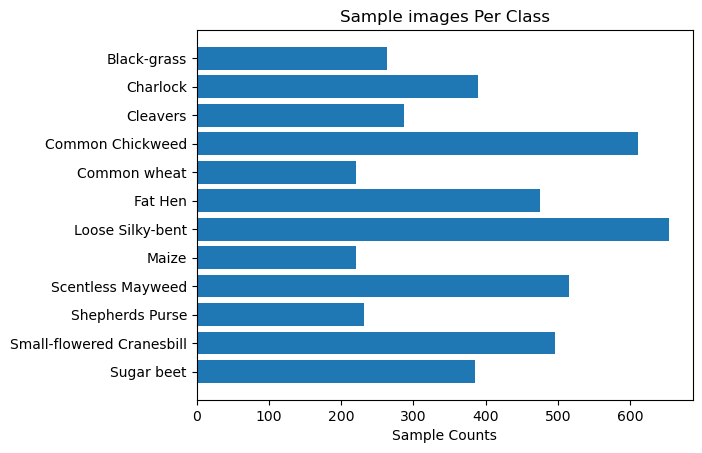

In [22]:
######## PLOTTING THE COUNT OF IMAGES IN EACH CLASS #########
classes= []
sample_counts= []

# for f in train_path:
for f in os.listdir('D:/Dataset - Plant-seedlings-classification/train'):
    train_class_path= os.path.join('D:/Dataset - Plant-seedlings-classification/train', f)
    if os.path.isdir(train_class_path):
        classes.append(f)
        sample_counts.append(len(os.listdir(train_class_path)))

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(classes))

ax.barh(y_pos, sample_counts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(classes)
ax.invert_yaxis()  
ax.set_xlabel('Sample Counts')
ax.set_title('Sample images Per Class')

plt.show()

# PREPARING  IMAGE DATASET  #########



In [23]:
def conv_images_to_df(main_directory, re_size=74, color=False):
    
    label_no = -1
    row = -1
    cols = []
    labels = []
    size = 0
    
    if(color ==  False):
        size = re_size*re_size
    else:
        size = re_size*re_size*3
        
    #Preparing Skleton of Main Dataframe
    for i in range(size):
            cols.append('pixel'+str(i))
    df = pd.DataFrame(columns=cols)
    #df.insert(0,'label','')

    #Iterating Folder by Folder and Images in it and converting them to rows in dataframe.(every image is a row in df)
    Mainfolder = Path(main_directory).glob('*')
    print("Working on....")
    for folder in Mainfolder:
        print(folder)
        images = Path(folder).glob('*.png')
        label_no = label_no + 1
        for img in images:
            row = row + 1
            resize = cv2.imread(str(img), 1)
            resize = cv2.resize(resize, (re_size,re_size))   
            if(color == False):
                gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
                gray = gray.ravel()     
                df.loc[row] = gray
            else:
                resize = resize.ravel()
                df.loc[row] = resize
                
            labels.append(label_no)
    df['label'] = pd.Series(labels)
    df = df.astype('int64')
    return df

In [24]:
# print("######### PREPARING GRAY DATASET..... #########")
# df_gray = conv_images_to_df('/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Plant-seedlings-classification/train', 74, color=False)

# print("######### GRAY DATASET IS COMPLETE.  #########")

In [25]:

print("######### PREPARING COLOUR DATASET..... #########")

df_color = conv_images_to_df('/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Plant-seedlings-classification/train', 74, color=True)
print("######### COLOUR DATASET IS COMPLETE.  #########")


######### PREPARING COLOUR DATASET..... #########
Working on....
######### COLOUR DATASET IS COMPLETE.  #########


In [ ]:
# Saving the Data frames(pixle values of the image) to separate files, as it takes a long time to prepare the dataframe

# df_gray.to_csv('/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Plant-seedlings-classification/Gray_Images.csv')
df_color.to_csv('/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Plant-seedlings-classification/Color_Images.csv')



In [ ]:
df_color = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Plant-seedlings-classification/Color_Images.csv")

df_color = df_color.drop(df_color.columns[[0]], axis = 1)
  
df_color.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel16389,pixel16390,pixel16391,pixel16392,pixel16393,pixel16394,pixel16395,pixel16396,pixel16397,pixel16398,pixel16399,pixel16400,pixel16401,pixel16402,pixel16403,pixel16404,pixel16405,pixel16406,pixel16407,pixel16408,pixel16409,pixel16410,pixel16411,pixel16412,pixel16413,pixel16414,pixel16415,pixel16416,pixel16417,pixel16418,pixel16419,pixel16420,pixel16421,pixel16422,pixel16423,pixel16424,pixel16425,pixel16426,pixel16427,label
0,22,45,77,41,62,85,66,85,105,65,87,103,63,81,99,64,78,97,80,93,109,79,92,107,72,87,100,44,57,74,42,54,71,51,68,85,49,68,88,46,...,55,52,53,58,55,54,56,53,54,58,56,57,52,50,50,58,54,55,59,54,56,67,62,68,137,132,125,156,148,139,160,151,146,142,136,132,70,64,68,0
1,44,50,57,48,52,67,55,69,86,90,111,121,53,73,95,51,73,91,54,76,92,45,58,83,34,48,72,35,56,77,40,66,88,41,70,90,46,62,81,52,...,39,62,83,44,67,87,53,70,88,55,68,86,57,69,86,54,69,86,48,72,97,48,75,104,32,67,103,37,64,97,60,79,98,62,78,95,63,79,95,0
2,22,32,48,23,35,52,37,50,67,36,55,71,65,86,99,36,59,80,39,55,78,44,63,81,42,56,74,68,84,97,62,76,88,57,80,101,53,75,95,43,...,161,161,160,159,159,157,137,137,138,61,63,62,109,108,111,129,130,132,136,136,138,138,137,139,132,133,134,127,126,129,120,119,124,112,115,114,108,108,111,0
3,49,83,107,51,85,108,53,86,110,53,88,111,60,93,116,63,96,120,60,96,120,65,103,126,54,97,121,51,94,118,48,90,114,49,85,110,42,73,101,42,...,34,49,77,40,52,82,45,56,82,55,66,85,64,77,90,67,83,93,72,89,98,73,89,98,77,90,101,73,87,98,68,82,95,67,80,95,68,80,95,0
4,170,169,168,166,164,163,174,170,169,172,169,169,170,168,167,168,167,164,167,165,167,171,171,170,170,166,167,171,167,167,167,167,166,169,170,168,165,161,160,173,...,27,44,70,26,43,69,24,38,63,31,43,69,24,37,55,26,30,44,33,44,53,35,50,65,30,45,59,22,31,50,24,30,49,29,42,56,43,55,69,0


In [ ]:
df_color.shape

(4750, 16429)

In [ ]:
## In colour dataframe, the coulmns are 74 * 74 * 3 (coloured) = 16428. Adding the lable to the columns make it total 16429 columns.

## And we have total 4750 rows(images in all the training floders)

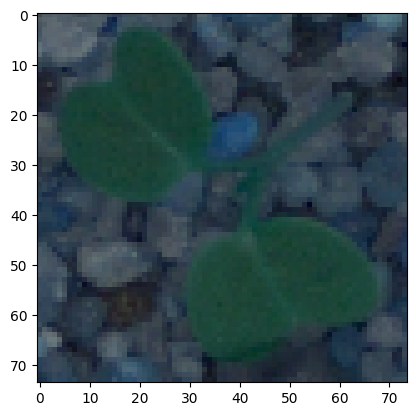

In [ ]:
# Plotting a random image to verify the data in dataframe
plt.imshow(np.array(df_color.drop('label', axis=1).loc[300]).reshape(74,74,3))


# SUPERVISED LEARNING FOR COMPUTER VISION


### USING KNN ALGORITHM #####################

In [ ]:
X = df_color.drop(["label"], axis=1)
y = df_color["label"]

In [ ]:
############################ SCALING THE DATA AS WE ARE USING KNN CLASSIFIER ##############################

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X =  sc.fit_transform(X)

sc_X[1]

array([-0.51858919, -0.81571564, -1.1213801 , ...,  0.04697673,
        0.11075206,  0.19386615])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(sc_X,y,test_size=1/3,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3166, 16428)
(1584, 16428)
(3166,)
(1584,)


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
print("Train Score is ", knn.score(X_train,y_train))
print("Test Score is ", knn.score(X_test,y_test))


Train Score is  0.47157296272899557
Test Score is  0.24053030303030304


########
 Supervised KNN Algorithm model overfitted #######

In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,10,11,All
True,,,,,,,,,,,,,
0,10,1,2,8,4,8,31,0,29,2,0,1,96
1,2,58,3,3,7,4,5,2,38,0,8,1,131
2,4,19,19,0,13,3,8,0,20,2,5,0,93
3,6,11,1,35,5,5,8,4,136,5,2,0,218
4,5,3,0,7,12,8,12,0,25,0,1,0,73
5,5,6,3,11,9,21,26,2,72,0,2,0,157
6,13,5,1,5,21,31,73,0,62,7,1,0,219
7,2,3,0,3,4,5,6,12,38,2,1,0,76
8,3,12,0,14,2,10,8,1,106,1,4,0,161


In [ ]:
###  The model predicted many seedlings mistakenly as 'Scentless Mayweed'

In [ ]:
#confusion matrix in a graffical representation

Text(0.5, 23.52222222222222, 'Predicted label')

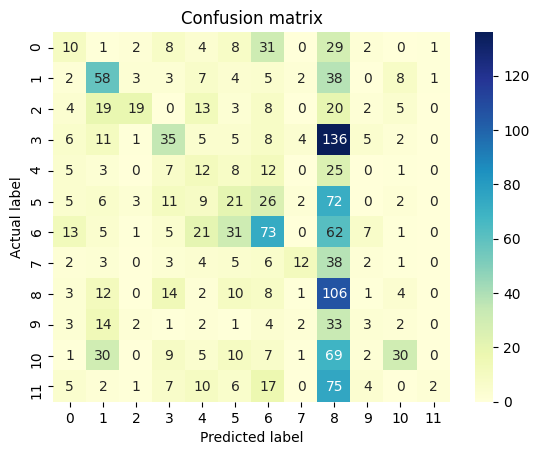

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Precision = TP/(TP + FP)
# Recall = TP/(TP+FN)
# F1 = 2 x (precision x recall)/(precision + recall)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.17      0.10      0.13        96
           2       0.35      0.44      0.39       131
           3       0.59      0.20      0.30        93
           4       0.34      0.16      0.22       218
           5       0.13      0.16      0.14        73
           6       0.19      0.13      0.16       157
           7       0.36      0.33      0.34       219
           8       0.50      0.16      0.24        76
           9       0.15      0.66      0.25       161
          10       0.11      0.04      0.06        67
          11       0.54      0.18      0.27       164
          12       0.50      0.02      0.03       129

    accuracy                           0.24      1584
   macro avg       0.33      0.22      0.21      1584
weighted avg       0.33      0.24      0.23      1584



# ANN FOR COMPUTER VISION

In [ ]:
X_train.shape

(3166, 74, 74, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

In [ ]:
len(X_train)

3166

In [ ]:
# X_train = X_train.reshape(74,74, 3)

# model.add(tf.keras.lXayers.Reshape((3, 4), input_shape=(12,)))

In [ ]:
from tensorflow.keras.layers import LeakyReLU


LR = LeakyReLU(alpha=0.01)

nn_model = tf.keras.models.Sequential([
          # tf.keras.layers.BatchNormalization(input_shape=(74,74,3)), 
          tf.keras.layers.Dense(3166, input_shape=(74,74,3)),   
          tf.keras.layers.Dense(1000,activation=LR),
          tf.keras.layers.Dropout(0.10),
          tf.keras.layers.Dense(500,activation=LR),
          tf.keras.layers.Dropout(0.10),
          tf.keras.layers.Dense(200,activation=LR),
          tf.keras.layers.Dropout(0.10),
          tf.keras.layers.Dense(100,activation=LR),
          tf.keras.layers.Dropout(0.10),
          tf.keras.layers.Dense(12,activation="softmax",name='Output')])

In [ ]:
# model = tf.keras.Sequential()
# model.add(layers.Flatten())
# model.add(layers.Dense(16428, input_shape=(74, 74,3)))
# model.add(layers.Dense(2000, activation='relu'))
# model.add(layers.Dropout(0.2))        
# model.add(layers.Dense(1000, activation='relu'))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Dense(12, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])          

In [ ]:
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 74, 74, 3166)      12664     
_________________________________________________________________
dense_19 (Dense)             (None, 74, 74, 1000)      3167000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 1000)      0         
_________________________________________________________________
dense_20 (Dense)             (None, 74, 74, 500)       500500    
_________________________________________________________________
dropout_7 (Dropout)          (None, 74, 74, 500)       0         
_________________________________________________________________
dense_21 (Dense)             (None, 74, 74, 200)       100200    
_________________________________________________________________
dropout_8 (Dropout)          (None, 74, 74, 200)      

In [ ]:
# y_train.unique()

In [ ]:
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, num_classes=12)
Y_test = np_utils.to_categorical(y_test, num_classes=12)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (3166,)
Shape after one-hot encoding:  (3166, 12)


In [ ]:
Y_train[2]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:

# # Initializing Input vector
# class_vector =[2, 5, 6, 1, 4, 2, 3, 2]
# print(class_vector)
  
# # Applying the function on input class vector
# from keras.utils import to_categorical
# output_matrix = to_categorical(class_vector, num_classes = 7, dtype ="int32")
  
# print(output_matrix)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3166, 74, 74, 3)
(1584, 74, 74, 3)
(3166, 12)
(1584, 12)


In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='classify', save_best_only=True, verbose=False)

In [ ]:
nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience =3, restore_best_weights=True)

# x_train_nn = X_train.reshape(-1, 74*74)


In [ ]:
training = nn_model.fit(X_train, Y_train, batch_size=200, epochs=2, validation_data=(X_test, Y_test),verbose=True, callbacks=[ckpt_callback])


Epoch 1/2


ValueError: ignored

In [ ]:
nn_history = nn_model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=100,callbacks=callback)

Epoch 1/100


ValueError: ignored

In [ ]:
CNN_history = nn_model.fit(X_train, Y_train, batch_size=128, epochs=25, validation_data=(X_test, Y_test))


Epoch 1/25


ValueError: ignored

# CNN FOR COMPUTER VISION

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score

# resetting the X_train, X_test, y_train, y_test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

# dataframes to array conversion

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train = X_train.reshape(X_train.shape[0], 74, 74, 3)
X_test = X_test.reshape(X_test.shape[0], 74, 74, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255


In [31]:
type(X_train)

numpy.ndarray

In [32]:

# one-hot encoding using keras' numpy-related utilities
n_classes = 12
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (3166,)
Shape after one-hot encoding:  (3166, 12)


In [33]:
Y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [34]:

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(74,74,3)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(50, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(75, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(50, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(12, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [36]:
# training the model for 8 epochs
CNN_history = model.fit(X_train, Y_train, batch_size=128, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8
25/25 [==============================] - 632s 25s/step - loss: 0.8736 - accuracy: 0.7040 - val_loss: 1.1060 - val_accuracy: 0.6357
Epoch 2/8
25/25 [==============================] - 640s 26s/step - loss: 0.7581 - accuracy: 0.7438 - val_loss: 0.9835 - val_accuracy: 0.6673
Epoch 3/8
25/25 [==============================] - 648s 26s/step - loss: 0.6087 - accuracy: 0.8039 - val_loss: 1.0384 - val_accuracy: 0.6736
Epoch 4/8
25/25 [==============================] - 641s 26s/step - loss: 0.5153 - accuracy: 0.8260 - val_loss: 1.1531 - val_accuracy: 0.6641
Epoch 5/8
25/25 [==============================] - 647s 26s/step - loss: 0.4286 - accuracy: 0.8515 - val_loss: 1.2073 - val_accuracy: 0.6698
Epoch 6/8
25/25 [==============================] - 649s 26s/step - loss: 0.4054 - accuracy: 0.8594 - val_loss: 1.1855 - val_accuracy: 0.6477
Epoch 7/8
25/25 [==============================] - 644s 26s/step - loss: 0.3248 - accuracy: 0.8850 - val_loss: 1.2616 - val_accuracy: 0.6730
Epoch 8/8
25/

In [37]:
print(CNN_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


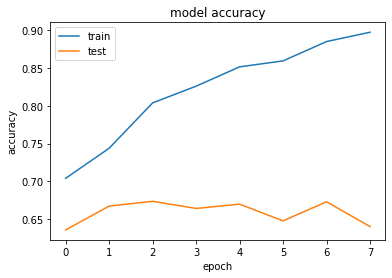

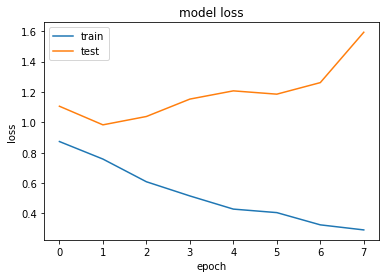

In [38]:
# summarize history for accuracy
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
# excute only once

import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Dataset - Prediction.zip", 'r')
zip_ref.extractall("//content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Dataset - Prediction")
zip_ref.close()

In [ ]:
predict_image_path = '/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Dataset - Prediction/Prediction/Predict.png'

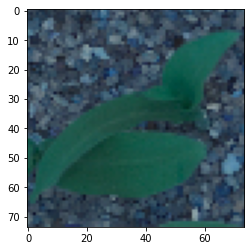

In [44]:
#Lets Check the Image we Need to Predict 
plt.imshow(cv2.resize(cv2.imread('/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Dataset - Prediction/Prediction/Predict.png', 1), (74,74)))

In [46]:
model.predict(cv2.resize(cv2.imread('/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Dataset - Prediction/Prediction/Predict.png', 1), (74,74)).reshape(1,74,74,3))

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
######################## THE CNN MODEL PREDICTED THE GIVEN IMAGE AS MAIGE ###################

# PART 3 : IMAGES TO DATASET CONVERSION

In [48]:
# excute only once

import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Dataset - Images.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Dataset - Images")
zip_ref.close()

In [63]:
Cars_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNN_Proj_1/Cars_df.csv')


In [64]:
Cars_df.head()

,Image_id,Color,Brand,Model,Varient,Facing_view
0,00011.jpg,White,Buick,Verano,Sedan,Back
1,00006.jpg,Red,Honda,1985 CRX like,convertible,Isometric View
2,00004.jpg,Red,Hyundai,Sonata Hybrid,Sedan,Back
3,00015.jpg,Orange,Volvo,S60,Sedan,Isometric View
4,00009.jpg,Gray,Mitsubishi,Lancer ES,Sedan,Isometric View
